# Digital Marketing Analytics - Group Assignment 1 

### Context

- Multi-channel company with sales of $700M per year
- Retail stores, Catalog, Website
- Brand is well known nationaly, strong positive reputation, good long term customer loyalty
- Food products, purchased as gifts for Christmas

### Marketing challenges

1. CRM (contact management across channels)
2. Competitive marketplace for Christmas gifts
3. Generating business off Christmas

3 differrent marketing channels: __retail, catalogue, website__

## Importing libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [3]:
# Display options
pd.options.display.max_columns = None # display all columns
pd.options.display.max_rows = None # display all rows

## Exploratory Data Analysis

### Dataset

4 files:

In [49]:
# Load datasets
customers = pd.read_csv('datasets/DMEFExtractSummaryV01.csv')
contacts = pd.read_csv('datasets/DMEFExtractContactsV01.csv')
orders = pd.read_csv('datasets/DMEFExtractOrdersV01.csv')
line_items = pd.read_csv('datasets/DMEFExtractLinesV01.csv')

1. "DMEFExtractSummaryV01.csv": __Customer file__.
    - customer ID (*cust_ID*)
    - First 3 digits or the customer's ZIPCode (*SCF_Code*)
    - Purchasing behaviour variables have a naming scheme with 3 components: 
        - Channel: 
            - _Ret_ (retail), 
            - _Int_ (internet)
            - _Cat_ (catalog)
        - Season: _F_ (fall) or _S_ (spring) followed by the last 2 digits of the year. Summaries for the period prior to 2004 have the designation Pre04.
        - Measure:
            - _Dollars_ (Retail sales), 
            - _GDollars_ (Gift), 
            - _NGDollars_ (Non gift),
            -  _Orders_ (number of orders made),
            - _Trips_ (number of trips to retail store)
            -  _Lines_ (Number of different product lines purchased (a product line is a collection of similar products sold under one brand by a single company))
            
            For _Pre04_ (before 2004), _Recency_: recency of last purchase measured in number of season prior to 2004 (99 means not purchased in the channel prior to 2004)

        For example *RetF07Dollars*: customer's Fall 2007 Retail sales dollar total 

    - *EmailsSeasonYY*: Number of mails sent to the customer during this period
    - *CatCircSeasonYY*: Number of catalogs sent to the customer during this period
    - *GiftRecSeasonYY*: "Gifts recipiens counts for this season"
    - *NewGRSeasonYY*: __?__

    - *First YYMM*: Year and Month of the customer's first purchase
    - *FirstChannel*: Channel used for the customer's first purchase 
    - *FirstDollar*: Amount spent on the customer's first purchas
    
    - *AcqDate*: Year and Month that the company added the customer to its database.
    - *StoreDist*: Estimated distance from the customer's address to the nearest store in miles
    - Interest in topics, "Y" or "N" (*Travel, CurrAff, CurrEv, Wines, FineArts, Exercise, SelfHelp, Collect, Needle, Sewing, DogOwner, CarOwner, Cooking, Pets, Fashion, Camping, Hunting* and *Boating*)
    - Presence of children of various age ranges in the household (*Child0_2, Child3_5, Child6_11, Child12_16* and *Child17_18*)
    - _Email_: "Y" or "N", permission to send e-mails to the customer.
    - _HomeValue_: Estimated value of the customer's home in $

    - _AgeCode, IncCode, HomeCode, Dwelling, LengthRes_ and _OccupCd_:  Reference for these codes are not available

In [5]:
customers.head()

,Cust_ID,SCF_Code,RetF07Dollars,RetF07Trips,RetF07Lines,RetS07Dollars,RetS07Trips,RetS07Lines,RetF06Dollars,RetF06Trips,RetF06Lines,RetS06Dollars,RetS06Trips,RetS06Lines,RetF05Dollars,RetF05Trips,RetF05Lines,RetS05Dollars,RetS05Trips,RetS05Lines,RetF04Dollars,RetF04Trips,RetF04Lines,RetS04Dollars,RetS04Trips,RetS04Lines,RetPre04Dollars,RetPre04Trips,RetPre04Lines,RetPre04Recency,IntF07GDollars,IntF07NGDollars,IntF07Orders,IntF07Lines,IntS07GDollars,IntS07NGDollars,IntS07Orders,IntS07Lines,IntF06GDollars,IntF06NGDollars,IntF06Orders,IntF06Lines,IntS06GDollars,IntS06NGDollars,IntS06Orders,IntS06Lines,IntF05GDollars,IntF05NGDollars,IntF05Orders,IntF05Lines,IntS05GDollars,IntS05NGDollars,IntS05Orders,IntS05Lines,IntF04GDollars,IntF04NGDollars,IntF04Orders,IntF04Lines,IntS04GDollars,IntS04NGDollars,IntS04Orders,IntS04Lines,IntPre04GDollars,IntPre04NGDollars,IntPre04Orders,IntPre04Lines,IntPre04Recency,CatF07GDollars,CatF07NGDollars,CatF07Orders,CatF07Lines,CatS07GDollars,CatS07NGDollars,CatS07Orders,CatS07Lines,CatF06GDollars,CatF06NGDollars,CatF06Orders,CatF06Lines,CatS06GDollars,CatS06NGDollars,CatS06Orders,CatS06Lines,CatF05GDollars,CatF05NGDollars,CatF05Orders,CatF05Lines,CatS05GDollars,CatS05NGDollars,CatS05Orders,CatS05Lines,CatF04GDollars,CatF04NGDollars,CatF04Orders,CatF04Lines,CatS04GDollars,CatS04NGDollars,CatS04Orders,CatS04Lines,CatPre04GDollars,CatPre04NGDollars,CatPre04Orders,CatPre04Lines,CatPre04Recency,EmailsF07,EmailsS07,EmailsF06,EmailsS06,EmailsF05,EmailsS05,CatCircF07,CatCircS07,CatCircF06,CatCircS06,CatCircF05,CatCircS05,GiftRecF07,GiftRecS07,GiftRecF06,GiftRecS06,GiftRecF05,GiftRecS05,GiftRecF04,GiftRecS04,GiftRecPre04,NewGRF07,NewGRS07,NewGRF06,NewGRS06,NewGRF05,NewGRS05,NewGRF04,NewGRS04,NewGRPre04,FirstYYMM,FirstChannel,FirstDollar,StoreDist,AcqDate,Email,OccupCd,Travel,CurrAff,CurrEv,Wines,FineArts,Exercise,SelfHelp,Collect,Needle,Sewing,DogOwner,CarOwner,Cooking,Pets,Fashion,Camping,Hunting,Boating,AgeCode,IncCode,HomeCode,Child0_2,Child3_5,Child6_11,Child12_16,Child17_18,Dwelling,LengthRes,HomeValue
0,22120,346,0,0,0,0,0,0,14,1,1,0,0,0,0,0,0,0,0,0,70,1,5,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,6,1,4,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200412,Ret,70,15.93,200412,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,4,8,2,N,N,N,N,N,1,8,0
1,24436,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,41,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,61,16,37,9,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,200706,Cat,41,,199611,Y,,N,N,N,,N,,,N,N,N,N,N,N,N,N,,N,,,,,N,N,N,N,N,,3,0
2,29278,85,0,0,0,0,0,0,63,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,29,0,1,1,0,0,0,0,27,0,1,1,0,0,0,0,65,0,1,2,0,0,0,0,65,0,1,2,0,0,0,0,25,0,1,1,1,0,0,0,0,0,0,2,0,2,0,3,2,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,1,200312,Cat,25,0,200312,N,,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,N,Y,N,Y,N,N,N,7,9,2,N,N,N,N,N,2,2,0
3,50011,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,46,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,34,12,42,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200301,Int,82,,199712,Y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,51943,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200112,Cat,209,,199903,N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


2. "DMEFExtractContactsV01": __Contact file__.
    - customer ID (*cust_ID*)
    - *ContactDate*: date the contact was made
    - *ContactType*: Catalaog (C) or Email (E)

In [6]:
contacts.head(5)

,Cust_ID,ContactDate,ContactType
0,22120,20070907,C
1,22120,20071101,C
2,22120,20071011,C
3,22120,20071122,C
4,22120,20071206,C


In [7]:
# Calculate value counts for each contact type
contact_distribution = contacts['ContactType'].value_counts()

# Convert to DataFrame for better formatting
contact_distribution_df = contact_distribution.reset_index()
contact_distribution_df.columns = ['Contact Type', 'Count']

# Replace 'E' with 'Email' and 'C' with 'Catalog' in the output DataFrame only
contact_distribution_df['Contact Type'] = contact_distribution_df['Contact Type'].replace({'E': 'Email', 'C': 'Catalog'})

# Apply thousand separator
contact_distribution_df['Count'] = contact_distribution_df['Count'].apply(lambda x: f"{x:,}")

# Styling the DataFrame for better readability
styled_df = contact_distribution_df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [
            ('background-color', '#f4f4f4'),
            ('color', 'black')
        ]
    }]
).set_properties(**{
    'text-align': 'left',
}).hide(axis='index')  # Hide the index column


styled_df

Contact Type,Count
Email,"2,368,315"
Catalog,"1,021,014"


3. "DMEFExtractOrdersV01.csv": __Order file__.
    - customer ID (*cust_ID*)
    - *OrderNum*: order number that links order and line item records
    - *OrderDate*
    - *OrderMethod*: 
        - *ST*: Store
        - *I*: Internet
        - *P*: Phone
        - *M*: Mail
        
        Phone and mail are the two methods by which catalog channel orders are placed

    - *PaymentType*:
        - *BC*: Bankcard
        - *CA*: Cash
        - *CK*: Check
        - *GC*: Gift certificate
        - *HA*: House account
        - *NV* and *PC*: not documented by the company. 
    
        Virtually all payments are bankcard, cash or check.

In [8]:
orders.head(5)

,Cust_ID,OrderNum,OrderDate,OrderMethod,PaymentType
0,22120,6642001731,20041213,ST,BC
1,22120,6643008965,20061209,ST,CA
2,24436,7200158663,20070616,P,BC
3,29278,2200159161,20031201,P,BC
4,29278,5800062930,20061208,P,BC


4. "DMEFExtractLinesV01.csv": __Order file__.
    - customer ID (*cust_ID*)
    - *OrderNum*: order number that links order and line item records
    - *OrderDate*
    - *LineDollars*: Selling price of the line item in $
    - *Gift*: "Y" or "N", indicates whether the item was given as a gift. Not recorded for Retail channel
    - *RecipNum*: ID number of a gift recipient. Can be used to see if a recipient receives multiple gifts over time.

In [9]:
line_items.head(5)

,Cust_ID,OrderNum,OrderDate,LineDollars,Gift,RecipNum
0,22120,6643008965,20061209,13.95,,
1,22120,6642001731,20041213,10.95,,
2,22120,6642001731,20041213,4.95,,
3,22120,6642001731,20041213,34.95,,
4,22120,6642001731,20041213,10.95,,


## __1.Which channel has better response rates, catalog mailing or email__?

In [10]:
# Convert 'ContactDate' and 'OrderDate' to datetime
contacts['ContactDate'] = pd.to_datetime(contacts['ContactDate'].astype(str), format='%Y%m%d') 
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'].astype(str), format='%Y%m%d') 

In [11]:
order_sub = orders.groupby(['Cust_ID', 'OrderDate']).agg(n_of_order=('OrderNum', 'count')).reset_index() # Group by 'Cust_ID' and 'OrderDate' columns to count the number of orders per day for each customer.

# Create contact_c and contact_e DataFrames for each contact type count the number of contacts sent per day for each customer.
contact_c = contacts[contacts['ContactType'] == 'C'].groupby(['Cust_ID', 'ContactDate']).size().reset_index(name='catalog_sent')
contact_e = contacts[contacts['ContactType'] == 'E'].groupby(['Cust_ID', 'ContactDate']).size().reset_index(name='email_sent')


In [12]:
order_sub.head()

,Cust_ID,OrderDate,n_of_order
0,22120,2004-12-13,1
1,22120,2006-12-09,1
2,24436,2007-06-16,1
3,29278,2003-12-01,1
4,29278,2004-12-11,1


In [13]:
contact_c.head(5)

,Cust_ID,ContactDate,catalog_sent
0,22120,2005-04-14,2
1,22120,2005-09-09,1
2,22120,2005-10-14,1
3,22120,2005-11-03,1
4,22120,2005-11-10,1


In [14]:
contact_e.head(5)

,Cust_ID,ContactDate,email_sent
0,24436,2006-03-21,1
1,24436,2006-04-03,1
2,24436,2006-04-06,1
3,24436,2006-04-27,1
4,24436,2006-05-04,1


We create a function to calculate the response rate. This function takes the contact DataFrame (regarding catalogs or emails), the order_sub DataFrame, the channel (email or catalog), and the window (in days) as inputs, and returns the response rate. This allows us to calculate the response rate for different channels and windows.

In [15]:
def calculate_response_rate_inflated(contact_df, order_df, channel, window):
    # Merge contact and order DataFrames on 'Cust_ID' column to find customers who received a channel and made a purchase within window days.
    response_df = pd.merge(contact_df, order_df, on='Cust_ID')
    response_df = response_df[(response_df['OrderDate'] >= response_df['ContactDate']) &  
                            (response_df['OrderDate'] <= response_df['ContactDate'] + pd.DateOffset(days=window))]

    # Aggregate to find total responses
    responded_df = response_df.groupby('Cust_ID').agg({f'{channel}_sent': 'sum'}).reset_index()

    # Total channel sent
    total_sent = contact_df[f'{channel}_sent'].sum()

    # Response rate calculation
    response_rate = responded_df[f'{channel}_sent'].sum() / total_sent

    return response_rate

In [16]:
# Calculate response rate for email and catalog contacts sent within 7 days
response_rate_inflated_email_7 = calculate_response_rate_inflated(contact_e, order_sub, 'email', 7)
response_rate_inflated_catalog_7 = calculate_response_rate_inflated(contact_c, order_sub, 'catalog', 7)

# Calculate response rate for email and catalog contacts sent within 10 days
response_rate_inflated_email_10 = calculate_response_rate_inflated(contact_e, order_sub, 'email', 10)
response_rate_inflated_catalog_10 = calculate_response_rate_inflated(contact_c, order_sub, 'catalog', 10)

# Calculate response rate for email and catalog contacts sent within 14 days
response_rate_inflated_email_14 = calculate_response_rate_inflated(contact_e, order_sub, 'email', 14)
response_rate_inflated_catalog_14 = calculate_response_rate_inflated(contact_c, order_sub, 'catalog', 14)

# Calculate response rate for email and catalog contacts sent within 30 days
response_rate_inflated_email_30 = calculate_response_rate_inflated(contact_e, order_sub, 'email', 30)
response_rate_inflated_catalog_30 = calculate_response_rate_inflated(contact_c, order_sub, 'catalog', 30)

# Format these results in a nice table. For each window, make whoever has the highest response rate stand out.
response_rate_inflated_data = {
    'Channel': ['Email', 'Catalog'],
    '7 Days': [response_rate_inflated_email_7, response_rate_inflated_catalog_7],
    '10 Days': [response_rate_inflated_email_10, response_rate_inflated_catalog_10],
    '14 Days': [response_rate_inflated_email_14, response_rate_inflated_catalog_14],
    '30 Days': [response_rate_inflated_email_30, response_rate_inflated_catalog_30]
}

# Percentage formatting
for col in ['7 Days', '10 Days', '14 Days', '30 Days']:
    response_rate_inflated_data[col] = [f"{rate:.2%}" for rate in response_rate_inflated_data[col]]

# Create DataFrame
response_rate_inflated_df = pd.DataFrame(response_rate_inflated_data)

# Display the DataFrame
print("Response Rate Inflated:")
response_rate_inflated_df

Response Rate Inflated:


,Channel,7 Days,10 Days,14 Days,30 Days
0,Email,1.95%,2.58%,3.39%,6.02%
1,Catalog,1.93%,2.66%,3.73%,7.50%


Overall it seems like the __Catalog marketing channel has better response rates__ across different time windows, except for the 7 days window were it's really close. Although it's important to know that differences are marginal.

However, this function currently counts all responses within the window for each contact. This means if a customer makes a purchase that could be attributed to any of the multiple emails or catalogs received within the time window, all those contacts might be considered successful, inflating the perceived effectiveness of each individual email or catalog.

There are a couple of ways to refine the function, here we'll focus on weighted attribution using time decay. 


In [17]:
def calculate_weighted_response_rate(contact_df, order_df, channel, window, decay_rate=0.5):
    """
    Calculates the response rate using a time decay weighted attribution model.
    
    Args:
    - contact_df (DataFrame): DataFrame containing contact data.
    - order_df (DataFrame): DataFrame containing order data.
    - channel (str): Specifies the channel column prefix in contact_df.
    - window (int): Number of days from contact to consider a response valid.
    - decay_rate (float): Decay rate for the attribution weight; defaults to 0.5.

    Returns:
    - float: Calculated weighted response rate.
    """
    # Merge contact and order DataFrames on 'Cust_ID' column to find customers who received a channel and made a purchase within window days.
    response_df = pd.merge(contact_df, order_df, on='Cust_ID')
    response_df = response_df[(response_df['OrderDate'] >= response_df['ContactDate']) &  
                            (response_df['OrderDate'] <= response_df['ContactDate'] + pd.DateOffset(days=window))]

    # Calculate the difference in days between contact and order dates
    response_df['days_diff'] = (response_df['OrderDate'] - response_df['ContactDate']).dt.days

    # Calculate the weight for each response
    response_df['weight'] = decay_rate ** response_df['days_diff']

    # Calculate weighted responses by multiplying contact sent indicator by weights
    response_df['weighted_responses'] = response_df[channel + '_sent'] * response_df['weight']

    # Sum of all weighted responses
    total_weighted_responses = response_df['weighted_responses'].sum()

    # Total potential responses (total contacts sent)
    total_sent = contact_df[channel + '_sent'].sum()

    # Calculate the weighted response rate
    weighted_response_rate = total_weighted_responses / total_sent

    return weighted_response_rate

In [18]:
# Calculate weighted response rate for email and catalog contacts sent within 7 days
response_rate_weighted_email_7 = calculate_weighted_response_rate(contact_e, order_sub, 'email', 7)
response_rate_weighted_catalog_7 = calculate_weighted_response_rate(contact_c, order_sub, 'catalog', 7)

# Calculate weighted response rate for email and catalog contacts sent within 10 days
response_rate_weighted_email_10 = calculate_weighted_response_rate(contact_e, order_sub, 'email', 10)
response_rate_weighted_catalog_10 = calculate_weighted_response_rate(contact_c, order_sub, 'catalog', 10)

# Calculate weighted response rate for email and catalog contacts sent within 14 days
response_rate_weighted_email_14 = calculate_weighted_response_rate(contact_e, order_sub, 'email', 14)
response_rate_weighted_catalog_14 = calculate_weighted_response_rate(contact_c, order_sub, 'catalog', 14)

# Calculate weighted response rate for email and catalog contacts sent within 30 days
response_rate_weighted_email_30 = calculate_weighted_response_rate(contact_e, order_sub, 'email', 30)
response_rate_weighted_catalog_30 = calculate_weighted_response_rate(contact_c, order_sub, 'catalog', 30)

# Format these results in a nice table. For each window, make whoever has the highest response rate stand out.
response_rate_weighted_data = {
    'Channel': ['Email', 'Catalog'],
    '7 Days': [response_rate_weighted_email_7, response_rate_weighted_catalog_7],
    '10 Days': [response_rate_weighted_email_10, response_rate_weighted_catalog_10],
    '14 Days': [response_rate_weighted_email_14, response_rate_weighted_catalog_14],
    '30 Days': [response_rate_weighted_email_30, response_rate_weighted_catalog_30]
}

# Percentage formatting
for col in ['7 Days', '10 Days', '14 Days', '30 Days']:
    response_rate_weighted_data[col] = [f"{rate:.2%}" for rate in response_rate_weighted_data[col]]

# Create DataFrame
response_rate_weighted_df = pd.DataFrame(response_rate_weighted_data)

# Display the DataFrame
print("Weighted Response Rate:")

response_rate_weighted_df

Weighted Response Rate:


,Channel,7 Days,10 Days,14 Days,30 Days
0,Email,0.52%,0.53%,0.53%,0.53%
1,Catalog,0.43%,0.44%,0.44%,0.44%


In [19]:
def calculate_linear_response_rate(contact_df, order_df, channel, window):
    """
    Calculates the response rate using a linear attribution model.
    
    Args:
    - contact_df (DataFrame): DataFrame containing contact data.
    - order_df (DataFrame): DataFrame containing order data.
    - channel (str): The channel column name prefix in contact_df.
    - window (int): Number of days from contact to consider a response valid.
    
    Returns:
    - float: Calculated response rate.
    """
    # Merge contact and order DataFrames on 'Cust_ID' column
    response_df = pd.merge(contact_df, order_df, on='Cust_ID')
    # Filter for orders that happened after the contact and within the window
    response_df = response_df[(response_df['OrderDate'] >= response_df['ContactDate']) &
                              (response_df['OrderDate'] <= response_df['ContactDate'] + pd.DateOffset(days=window))]

    # Group by customer and order to count the number of valid contacts per order
    response_df['Valid_Contacts'] = response_df.groupby(['Cust_ID', 'OrderDate'])['ContactDate'].transform('count')

    # Calculate the linear credit for each contact (1 / number of contacts leading to that order)
    response_df['Credit'] = 1 / response_df['Valid_Contacts']

    # Sum up all credits to get the total attributed responses
    total_attributed_responses = response_df['Credit'].sum()

    # Total possible responses (total contacts made)
    total_contacts_made = contact_df[channel + '_sent'].sum()

    # Calculate the response rate
    response_rate = total_attributed_responses / total_contacts_made

    return response_rate

In [20]:
# Calculate linear response rate for email and catalog contacts sent within 7 days
response_rate_linear_email_7 = calculate_linear_response_rate(contact_e, order_sub, 'email', 7)
response_rate_linear_catalog_7 = calculate_linear_response_rate(contact_c, order_sub, 'catalog', 7)

# Calculate linear response rate for email and catalog contacts sent within 10 days
response_rate_linear_email_10 = calculate_linear_response_rate(contact_e, order_sub, 'email', 10)
response_rate_linear_catalog_10 = calculate_linear_response_rate(contact_c, order_sub, 'catalog', 10)

# Calculate linear response rate for email and catalog contacts sent within 14 days
response_rate_linear_email_14 = calculate_linear_response_rate(contact_e, order_sub, 'email', 14)
response_rate_linear_catalog_14 = calculate_linear_response_rate(contact_c, order_sub, 'catalog', 14)

# Calculate linear response rate for email and catalog contacts sent within 30 days
response_rate_linear_email_30 = calculate_linear_response_rate(contact_e, order_sub, 'email', 30)
response_rate_linear_catalog_30 = calculate_linear_response_rate(contact_c, order_sub, 'catalog', 30)

# Format these results in a nice table. For each window, make whoever has the highest response rate stand out.
response_rate_linear_data = {
    'Channel': ['Email', 'Catalog'],
    '7 Days': [response_rate_linear_email_7, response_rate_linear_catalog_7],
    '10 Days': [response_rate_linear_email_10, response_rate_linear_catalog_10],
    '14 Days': [response_rate_linear_email_14, response_rate_linear_catalog_14],
    '30 Days': [response_rate_linear_email_30, response_rate_linear_catalog_30]
}

# Percentage formatting
for col in ['7 Days', '10 Days', '14 Days', '30 Days']:
    response_rate_linear_data[col] = [f"{rate:.2%}" for rate in response_rate_linear_data[col]]

# Create DataFrame
response_rate_linear_df = pd.DataFrame(response_rate_linear_data)

# Display the DataFrame
print("Linear Response Rate:")
response_rate_linear_df


Linear Response Rate:


,Channel,7 Days,10 Days,14 Days,30 Days
0,Email,0.57%,0.60%,0.62%,0.67%
1,Catalog,1.86%,2.42%,3.10%,4.05%


## __2. RFM Segmentation__

In [26]:
line_items.head()

,Cust_ID,OrderNum,OrderDate,LineDollars,Gift,RecipNum
0,22120,6643008965,20061209,13.95,,
1,22120,6642001731,20041213,10.95,,
2,22120,6642001731,20041213,4.95,,
3,22120,6642001731,20041213,34.95,,
4,22120,6642001731,20041213,10.95,,


In [50]:
# Convert 'OrderDate' to datetime
line_items['OrderDate'] = pd.to_datetime(line_items['OrderDate'].astype(str), format='%Y%m%d')

In [74]:
line_items.head()

,Cust_ID,OrderNum,OrderDate,LineDollars,Gift,RecipNum
0,22120,6643008965,2006-12-09,13.95,,
1,22120,6642001731,2004-12-13,10.95,,
2,22120,6642001731,2004-12-13,4.95,,
3,22120,6642001731,2004-12-13,34.95,,
4,22120,6642001731,2004-12-13,10.95,,


In [62]:
# Create the 'Recency' DataFrame
recency = line_items.groupby('Cust_ID').agg(
    last_purchase=('OrderDate', 'max') # Find the last purchase date for each customer
)
recency['Recency'] = (line_items['OrderDate'].max() - recency['last_purchase']).dt.days

# Create the 'Frequency' DataFrame
frequency = line_items.groupby('Cust_ID').agg(
    total_purchases=('OrderNum', 'nunique') # Count the number of unique orders for each customer
)

# Create the 'Monetary' DataFrame
monetary = line_items.groupby('Cust_ID').agg(
    avg_spend=('LineDollars', 'mean') # Calculate the average spend for each customer 
)

# Combine all into a single DataFrame
rfm = recency.join(frequency).join(monetary)

rfm.head()

,last_purchase,Recency,total_purchases,avg_spend
Cust_ID,,,,
22120,2006-12-09,388,2,13.950000
24436,2007-06-16,199,1,40.950000
29278,2007-12-10,22,7,30.394444
50011,2003-01-06,1821,1,40.950000
51943,2002-02-21,2140,2,116.450000


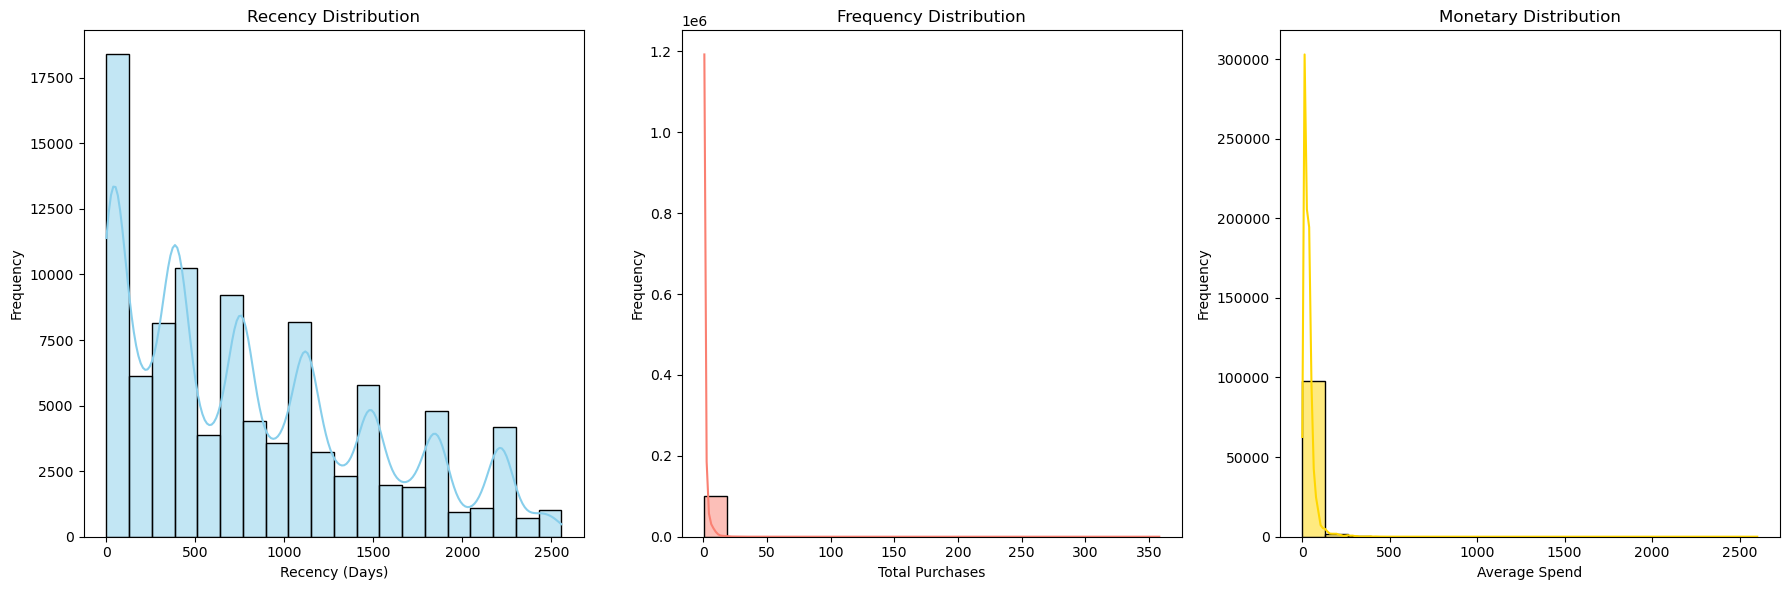

In [67]:
# Plot the distribution of Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm['Recency'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency')

sns.histplot(rfm['total_purchases'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Total Purchases')
axes[1].set_ylabel('Frequency')

sns.histplot(rfm['avg_spend'], bins=20, kde=True, color='gold', ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Average Spend')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [88]:
# Determine the number of quintiles
quintiles = 5

# Apply quintile segmentation
rfm['R_Score'] = pd.qcut(rfm['Recency'], quintiles, labels=range(5, 0, -1)) # Assign a score from 5 to 1 based on recency
frequency_bins = [0, 2, 5, 10, 20, np.inf] #np.inf is used to include all values greater than 10
rfm['F_Score'] = pd.cut(rfm['total_purchases'], bins=frequency_bins, labels=['1', '2', '3', '4', '5']) 
rfm['M_Score'] = pd.qcut(rfm['avg_spend'], quintiles, labels=range(1, 6))

# Combine the scores into a single RFM_Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Verify the DataFrame structure and data
rfm.head()

,last_purchase,Recency,total_purchases,avg_spend,R_Score,F_Score,M_Score,RFM_Score
Cust_ID,,,,,,,,
22120,2006-12-09,388,2,13.950000,4,1,2,412
24436,2007-06-16,199,1,40.950000,4,1,4,414
29278,2007-12-10,22,7,30.394444,5,3,3,533
50011,2003-01-06,1821,1,40.950000,1,1,4,114
51943,2002-02-21,2140,2,116.450000,1,1,5,115


In [90]:
# Top 10% of customers 
top_10_customers = rfm[rfm['RFM_Score'] == '555'].sort_values('avg_spend', ascending=False)

# Display the top 10% of customers
top_10_customers.head()

,last_purchase,Recency,total_purchases,avg_spend,R_Score,F_Score,M_Score,RFM_Score
Cust_ID,,,,,,,,
46481438,2007-11-19,43,35,130.735714,5,5,5,555
66055457,2007-12-11,21,21,117.981250,5,5,5,555
80349684,2007-12-18,14,22,72.842857,5,5,5,555
52683774,2007-12-21,11,24,63.638889,5,5,5,555
84175503,2007-11-01,61,44,63.283333,5,5,5,555


In [119]:
rfm['RFM_Score'].unique()

array(['412', '414', '533', '114', '115', '123', '113', '124', '213',
       '335', '215', '425', '112', '323', '214', '315', '415', '435',
       '212', '524', '413', '225', '125', '224', '514', '411', '322',
       '333', '311', '523', '532', '513', '535', '233', '334', '442',
       '525', '325', '312', '424', '314', '324', '534', '515', '134',
       '211', '422', '511', '433', '421', '332', '313', '223', '531',
       '434', '331', '221', '452', '111', '423', '234', '222', '543',
       '343', '445', '133', '321', '512', '432', '521', '522', '544',
       '542', '431', '552', '554', '541', '232', '122', '441', '443',
       '555', '231', '345', '444', '545', '344', '342', '245', '235',
       '135', '553', '351', '551', '121', '144', '341', '243', '454',
       '451', '252', '242', '244', '143', '455', '132', '453', '251',
       '241', '354', '145', '153', '353', '253', '154', '352', '254',
       '131', '142', '151'], dtype=object)

In [120]:
# Now that we have the RFM scores, we can compute the response rate for each RFM cell. 
#We will have a column for the email response rate and another for the catalog response rate.

# Create a DataFrame to store the response rates
response_rates = pd.DataFrame(columns=['RFM_Score', 'Response Rate Email', 'Response Rate Catalog'])

# Calculate the response rate for each RFM cell. We'll use the linear attribution model with a 7-day window.
# For example, for every customer whith RFM = 555, we calculate the number of emails/catalog sent to them and the number of orders placed within 7 days of the contact.
# We use the RFM_Score column as the index for the response_rates DataFrame.

# Iterate over each RFM cell
for i in rfm['RFM_Score'].unique():
    # Filter the RFM DataFrame for the current RFM cell
    rfm_sub = rfm[rfm['RFM_Score'] == i]
    
    # Filter the email contacts DataFrame for the current RFM cell
    contact_e_sub = contact_e[contact_e['Cust_ID'].isin(rfm_sub.index)]
    contact_c_sub = contact_c[contact_c['Cust_ID'].isin(rfm_sub.index)]
    
    # Calculate the linear response rate for the current RFM cell
    response_rate_email = calculate_linear_response_rate(contact_e_sub, order_sub, 'email', 7)
    response_rate_catalog = calculate_linear_response_rate(contact_c_sub, order_sub, 'catalog', 7)
    
    # Append the RFM score and response rate to the response_rates DataFrame
    response_rates = response_rates.append({'RFM_Score': i, 'Response Rate Email': response_rate_email, 'Response Rate Catalog':response_rate_catalog}, ignore_index=True)

/var/folders/k6/jp6lvt_92nv60tf7z1kwr8100000gn/T/ipykernel_3551/1669486840.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_rates = response_rates.append({'RFM_Score': i, 'Response Rate Email': response_rate_email, 'Response Rate Catalog':response_rate_catalog}, ignore_index=True)
/var/folders/k6/jp6lvt_92nv60tf7z1kwr8100000gn/T/ipykernel_3551/1669486840.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_rates = response_rates.append({'RFM_Score': i, 'Response Rate Email': response_rate_email, 'Response Rate Catalog':response_rate_catalog}, ignore_index=True)
/var/folders/k6/jp6lvt_92nv60tf7z1kwr8100000gn/T/ipykernel_3551/1669486840.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  response_rates 

In [121]:
response_rates

,RFM_Score,Response Rate Email,Response Rate Catalog
0,412,0.003800,0.010159
1,414,0.002581,0.013234
2,533,0.014605,0.055172
3,114,0.000000,0.000000
4,115,0.000000,0.000000
5,123,0.000000,0.000000
6,113,0.000000,0.000000
7,124,0.000000,0.000000
8,213,0.000573,0.000954
9,335,0.008211,0.021563


In [125]:
# Now we'll make a decision on how many catalogs to mail based on an estimate of ROI of the campaign. It costs a normalized $1 per mailing and an average profit of $30 per purchase)
# The average revenue for catalog mailing would be $31.
# We'll calculate the expected profit for each RFM cell and then decide how many catalogs to mail based on the expected profit.

# Calculate the expected profit for each RFM cell
response_rates['Expected Profit Catalog'] = response_rates['Response Rate Catalog'] * 30

# Calculate the number of catalogs to mail based on the expected profit
response_rates['Catalogs to Mail'] = np.ceil(response_rates['Expected Profit Catalog'] / 31)

#Format response rates in percentages
response_rates['Response Rate Email'] = response_rates['Response Rate Email'].apply(lambda x: f"{x:.2%}")
response_rates['Response Rate Catalog'] = response_rates['Response Rate Catalog'].apply(lambda x: f"{x:.2%}")

response_rates


,RFM_Score,Response Rate Email,Response Rate Catalog,Expected Profit Catalog,Catalogs to Mail
0,412,0.38%,1.02%,0.304778,1.0
1,414,0.26%,1.32%,0.397017,1.0
2,533,1.46%,5.52%,1.655159,1.0
3,114,0.00%,0.00%,0.000000,0.0
4,115,0.00%,0.00%,0.000000,0.0
5,123,0.00%,0.00%,0.000000,0.0
6,113,0.00%,0.00%,0.000000,0.0
7,124,0.00%,0.00%,0.000000,0.0
8,213,0.06%,0.10%,0.028620,1.0
9,335,0.82%,2.16%,0.646900,1.0


In [ ]:

# Calculate the total number of catalogs to mail
total_catalogs = response_rates['Catalogs to Mail'].sum()

# Display the total number of catalogs to mail
total_catalogs

# Calculate the total cost of mailing all catalogs
total_cost = total_catalogs * 1

# Calculate the total revenue from mailing all catalogs
total_revenue = total_catalogs * 31

# Calculate the total profit from mailing all catalogs
total_profit = total_revenue - total_cost

# Display the total profit
total_profit
